https://www.analyticsvidhya.com/blog/2021/08/linear-regression-and-gradient-descent-in-pytorch/


In [ ]:
import numpy as np
import torch

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                    [91, 88, 64],
                    [87, 134, 58],
                    [102, 43, 37],
                    [69, 96, 70]], dtype='float32')

targets = np.array([[56],
          [81],
          [119],
          [22],
          [103]], dtype='float32')

In [ ]:
# Convert inputs and targets to tensors
input = torch.from_numpy(inputs)
target = torch.from_numpy(targets)


print(input)
print(target)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
from torch.utils import data
from torch.utils.data import TensorDataset
dataset = TensorDataset(input, target)

print(dataset[:])

(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]]), tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]]))


Using Pytorch’s DataLoader class we can convert the dataset into batches of predefined batch size and create batches by picking samples from the dataset randomly.

In [ ]:

from torch.utils.data import DataLoader

batch_size = 5
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for inp,target in train_loader:
    print(inp)
    print(target)
    break


tensor([[ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.]])
tensor([[103.],
        [119.],
        [ 81.],
        [ 56.],
        [ 22.]])


In [ ]:
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(5,1, requires_grad=True)
print(w)
print(b)

tensor([[-0.1025, -1.0508, -0.8750]], requires_grad=True)
tensor([[-1.1160],
        [-0.8317],
        [ 1.1303],
        [ 0.2498],
        [ 0.0714]], requires_grad=True)


In [ ]:
def model(X):
    return X @ w.t() + b

def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/(2*difference.numel())
    
# numel() method returns the number of elements in the tensor.

for x,y in train_loader:
    preds = model(x)
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    
    print("Loss is : ", mse_loss(preds, y))

  


Prediction is :n tensor([[351.5450],
        [275.3419],
        [339.7699],
        [267.4523],
        [334.3695]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([[ 22.],
        [103.],
        [ 81.],
        [ 56.],
        [119.]])
Loss is :  tensor(29635.9570, grad_fn=<DivBackward0>)


In [ ]:
epochs = 100
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y)
        loss.backward()
        # Let's update the weights
        with torch.no_grad():
            w -= w.grad *1e-6
            b -= b.grad * 1e-6
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
    print(f"Epoch {i}/{epochs}: Loss: {loss}")

Epoch 0/100: Loss: 3341.735595703125
Epoch 1/100: Loss: 3354.107421875
Epoch 2/100: Loss: 3384.94189453125
Epoch 3/100: Loss: 3269.568115234375
Epoch 4/100: Loss: 3235.3759765625
Epoch 5/100: Loss: 3248.0693359375
Epoch 6/100: Loss: 3201.34521484375
Epoch 7/100: Loss: 3135.31396484375
Epoch 8/100: Loss: 3195.870361328125
Epoch 9/100: Loss: 3190.156982421875
Epoch 10/100: Loss: 3124.74609375
Epoch 11/100: Loss: 3135.96337890625
Epoch 12/100: Loss: 3149.727294921875
Epoch 13/100: Loss: 3044.2255859375
Epoch 14/100: Loss: 3088.02197265625
Epoch 15/100: Loss: 3027.77783203125
Epoch 16/100: Loss: 2977.29345703125
Epoch 17/100: Loss: 2936.03515625
Epoch 18/100: Loss: 2998.971435546875
Epoch 19/100: Loss: 2927.34912109375
Epoch 20/100: Loss: 2910.34033203125
Epoch 21/100: Loss: 2992.80810546875
Epoch 22/100: Loss: 2851.735107421875
Epoch 23/100: Loss: 2897.646484375
Epoch 24/100: Loss: 2886.947998046875
Epoch 25/100: Loss: 2844.12060546875
Epoch 26/100: Loss: 2795.65478515625
Epoch 27/100: Lo

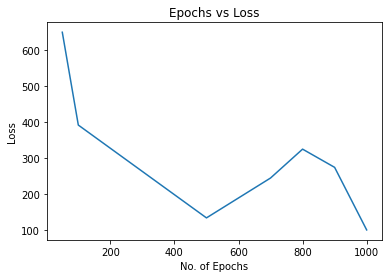

In [1]:
import matplotlib.pyplot as plt

x = [50, 100, 500, 700, 800, 900, 1000]
y = [648.4023, 391.0272, 133.6041, 244.1809, 324.2377, 273.7362, 100.2437]

plt.plot(x, y)
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
  
# function to show the plot
plt.show()